<a href="https://colab.research.google.com/github/Deepanshu2601/cognitive_computing-/blob/main/ass10ccipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

cricket isnt just a game to me its a feeling a rhythm that runs through my veins  my veins pop in intense cricket match  
Word tokens: 
 ['cricket', 'isnt', 'just', 'a', 'game', 'to', 'me', 'its', 'a', 'feeling', 'a', 'rhythm', 'that', 'runs', 'through', 'my', 'veins', 'my', 'veins', 'pop', 'in', 'intense', 'cricket', 'match']
Sentence tokens: 
 ['cricket isn’t just a game to me, it’s a feeling, a rhythm that runs through my veins , my veins pop in intense cricket match .']

Using nltk -> cricket, Using split -> cricket
Using nltk -> isnt, Using split -> isnt
Using nltk -> just, Using split -> just
Using nltk -> a, Using split -> a
Using nltk -> game, Using split -> game
Using nltk -> to, Using split -> to
Using nltk -> me, Using split -> me
Using nltk -> its, Using split -> its
Using nltk -> a, Using split -> a
Using nltk -> feeling, Using split -> feeling
Using nltk -> a, Using split -> a
Using nltk -> rhythm, Using split -> rhythm
Using nltk -> that, Using split -> that
Using nltk -

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

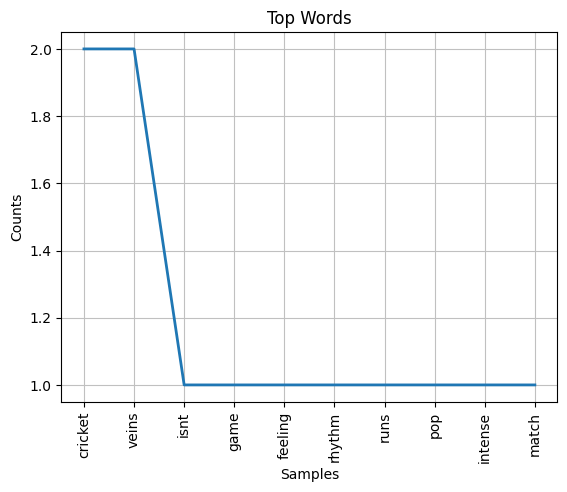

In [2]:
para = "Cricket isn’t just a game to me, It’s a feeling, a rhythm that runs through my veins , my veins pop in intense cricket match . "
para = para.lower()
para_clean = re.sub(r'[^\w\s]', '', para)
print(para_clean)

word_tokens = word_tokenize(para_clean)
sent_tokens = sent_tokenize(para)
print("Word tokens: \n",word_tokens)
print("Sentence tokens: \n",sent_tokens)
print()

split= para_clean.split()
for i in range(len(split)):
  print(f"Using nltk -> {word_tokens[i]}, Using split -> {split[i]}")
print()

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_tokens if w.lower() not in stop_words]
print("Without stopwords:\n", filtered_words)
print()

fd = FreqDist(filtered_words)
fd.plot(10, title="Top Words")

In [3]:
print("Words containing only alphabets: \n",re.findall(r'\b[a-zA-Z]+\b', para))
print()

print("Without stopwords:\n", filtered_words)
print()

ps = PorterStemmer()
lm = WordNetLemmatizer()

for word in filtered_words:
    print(f"{word} -> PorterStemmer: {ps.stem(word)},    Lemmatized: {lm.lemmatize(word)} ")
print()


Words containing only alphabets: 
 ['cricket', 'isn', 't', 'just', 'a', 'game', 'to', 'me', 'it', 's', 'a', 'feeling', 'a', 'rhythm', 'that', 'runs', 'through', 'my', 'veins', 'my', 'veins', 'pop', 'in', 'intense', 'cricket', 'match']

Without stopwords:
 ['cricket', 'isnt', 'game', 'feeling', 'rhythm', 'runs', 'veins', 'veins', 'pop', 'intense', 'cricket', 'match']

cricket -> PorterStemmer: cricket,    Lemmatized: cricket 
isnt -> PorterStemmer: isnt,    Lemmatized: isnt 
game -> PorterStemmer: game,    Lemmatized: game 
feeling -> PorterStemmer: feel,    Lemmatized: feeling 
rhythm -> PorterStemmer: rhythm,    Lemmatized: rhythm 
runs -> PorterStemmer: run,    Lemmatized: run 
veins -> PorterStemmer: vein,    Lemmatized: vein 
veins -> PorterStemmer: vein,    Lemmatized: vein 
pop -> PorterStemmer: pop,    Lemmatized: pop 
intense -> PorterStemmer: intens,    Lemmatized: intense 
cricket -> PorterStemmer: cricket,    Lemmatized: cricket 
match -> PorterStemmer: match,    Lemmatized:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

sent1 = "India needs its cards right to navigate a world governed by Trump’s tariffs"
sent2 = "Magnitude 5.2 earthquake shakes interior of San Diego County in California"
sent3 = "Parents worried after CBSE withdraws school's affiliation, leaves EWS students stranded"
sentences = [sent1,sent2,sent3]

cv = CountVectorizer()
X = cv.fit_transform(sentences)
print(cv.get_feature_names_out())
print(X.toarray())
print()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
feature_names = tfidf.get_feature_names_out()
print(tfidf.get_feature_names_out())
tfidf_matrix_to_array = tfidf_matrix.toarray()
print(tfidf_matrix_to_array)
print()

for i, row in enumerate(tfidf_matrix_to_array):
    print(f"Sentence {i+1} top 3 keywords:")
    top_indices = row.argsort()[::-1][:3]
    for idx in top_indices:
        print(feature_names[idx])
    print()

['affiliation' 'after' 'by' 'california' 'cards' 'cbse' 'county' 'diego'
 'earthquake' 'ews' 'governed' 'in' 'india' 'interior' 'its' 'leaves'
 'magnitude' 'navigate' 'needs' 'of' 'parents' 'right' 'san' 'school'
 'shakes' 'stranded' 'students' 'tariffs' 'to' 'trump' 'withdraws' 'world'
 'worried']
[[0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1]]

['affiliation' 'after' 'by' 'california' 'cards' 'cbse' 'county' 'diego'
 'earthquake' 'ews' 'governed' 'in' 'india' 'interior' 'its' 'leaves'
 'magnitude' 'navigate' 'needs' 'of' 'parents' 'right' 'san' 'school'
 'shakes' 'stranded' 'students' 'tariffs' 'to' 'trump' 'withdraws' 'world'
 'worried']
[[0.         0.         0.28867513 0.         0.28867513 0.
  0.         0.         0.         0.         0.28867513 0.
  0.28867513 0.         0.28867513 0.         0.         0.28867513
  0

In [4]:

t1 = "Blockchain refers to a distributed digital ledger that logs transactions over a network of computers. It guarantees transparency and data integrity by preventing unauthorized modifications. Initially driven by cryptocurrencies like Bitcoin, blockchain now powers sectors like finance, logistics, and electoral systems. Each block includes a batch of records and is cryptographically secured to the previous one."

t2 = "Augmented Reality, or AR, integrates digital content into the real world via mobile devices or AR headsets. It improves real-world interaction by overlaying images, audio, or information onto your surroundings. Seen in apps like Pokémon GO and utilized in sectors such as retail and healthcare, AR offers a more immersive and interactive experience. It connects real and digital spaces seamlessly in real-time."

data1 = set(t1.split())
data2 = set(t2.split())
jaccard = len(data1 & data2) / len(data1 | data2)
print("Jaccard Similarity:", jaccard)

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform([t1, t2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])

Jaccard Similarity: 0.08791208791208792
Cosine Similarity: 0.14755079000467156


In [6]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

text = (
    "Golden sunlight spilled in through the open window, casting warm patterns across the wooden floor. "
    "Morning's quiet melody drifted through the air, with birds chirping softly from the garden. "
    "A gentle breeze brought in the fresh scent of dew and blooming petals. "
    "An open notebook rested on the desk, its pages rustling faintly, ready to catch passing thoughts. "
    "The air felt alive with possibility, every second filled with quiet potential. "
    "In that serene moment, creativity began to spark, calling hand to pen. "
    "Though the morning was simple, its peaceful charm carried endless stories waiting to unfold."
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
token_list = tokenizer.texts_to_sequences([text])[0]
for i in range(1, len(token_list)):
    n_gram_seq = token_list[: i + 1]
    input_sequences.append(n_gram_seq)

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding="pre")

X = input_sequences[:, :-1]
labels = input_sequences[:, -1]
y = to_categorical(labels, num_classes=total_words)

model = Sequential([
    Embedding(input_dim=total_words, output_dim=50, input_length=max_seq_len - 1),
    LSTM(100),
    Dense(total_words, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, next_words, model, tokenizer, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding="pre")
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=1)[0]
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                seed_text += " " + word
                break
    return seed_text

seed = "morning"
print(generate_text(seed, 30, model, tokenizer, max_seq_len))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.0053 - loss: 4.3577
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0734 - loss: 4.3494
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1021 - loss: 4.3427
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1046 - loss: 4.3334
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0851 - loss: 4.3227
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1007 - loss: 4.2991
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1007 - loss: 4.2328
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1007 - loss: 4.1625
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.1046 - loss: 4.1204
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0890 - loss: 4.1015
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1007 - loss: 4.0451
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0812 - loss: 4.0037
E